Question 1

In [ ]:
print(dir(list))

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [ ]:
import copy

In [ ]:
class RowVectorFloat():
  def __init__(self, vec):
    self.vec = vec
  def __str__(self):
    out_str = ""
    for i in self.vec:
      out_str += f"{i} "
    return out_str
  def __len__(self):
    return len(self.vec)
  def __getitem__(self, ind):
    return self.vec[ind]
  def __setitem__(self, key, newvalue):
    self.vec[key] = newvalue
  def __rmul__(self, const):
    if type(const) is int or type(const) is float:
      out_list = RowVectorFloat(copy.copy(self.vec))
      for i in range(len(self)):
        out_list[i] *= const
      return out_list
    else:
      return self.__mul__(const, self)

  def __mul__(self, const):
    if type(const) is int or type(const) is float:
      out_list = RowVectorFloat(copy.copy(self.vec))
      for i in range(len(self)):
        out_list[i] *= const
      return out_list
    else:
      return self.__mul__(const, self)

  def __add__(self, other):
    if len(self) != len(other):
      raise Exception('Lists of different dimensions cannot be added')
      return ['lawda']
    else:
      out_list = RowVectorFloat(copy.copy(self.vec))
      for i in range(len(self)):
        out_list[i] += other.__getitem__(i)
      return out_list


In [ ]:
r = RowVectorFloat([1, 2, 4])
print(r)

1 2 4 


In [ ]:
print(len(r))

3


In [ ]:
print(r[1])

2


In [ ]:
r[2] = 5
print(r)

1 2 5 


In [ ]:
r1 = RowVectorFloat([1, 2 , 4])
r2 = RowVectorFloat([1, 1 , 1])
r3 = 2*r1 + (-3)*r2
print(r3)
print(r1)
print(r2)

-1 1 5 
1 2 4 
1 1 1 


In [ ]:
r1 = RowVectorFloat([1, 2 , 4])
r2 = RowVectorFloat([1, 1 , 1])
r3 = r1 +r2
print(r3)

2 3 5 


In [ ]:
r1 = RowVectorFloat([1, 2 , 4])
r2 = RowVectorFloat([1, 1 , 1])
print(r1*(1/2))

0.5 1.0 2.0 


Question 2

In [ ]:
import random
import numpy as np

In [ ]:
class SquareMatrixFloat():
  def __init__(self, dim):
    self.mat = []
    self.dim = dim
    for i in range(dim):
      self.mat.append(RowVectorFloat([0]*dim))

  def __str__(self):
    out_str = "The matrix is\n"
    for i in range(self.dim):
      out_str += self.mat[i].__str__()
      out_str += '\n'
    return out_str

  def sampleSymmetric(self):
    for i in range(self.dim):
      for j in range(self.dim):
        if i==j:
          self.mat[i][j] = round(random.uniform(0,self.dim),2)
        else:
          self.mat[i][j] = round(random.uniform(0,1),2)

  def toRowEchelonForm(self):
    if self.dim==0:
      return [-1]
    for i in range(self.dim):
      #self.mat[i] *= 1/self.mat[i][i]
      #print(f"i is {i}")
      #print(self.__str__())
      for j in range(i+1, self.dim):
        #print(j)
        self.mat[j] += (-1*(self.mat[j][i]/self.mat[i][i]))*self.mat[i]
      #print(self.__str__())
    for i in range(self.dim):
      self.mat[i] *= 1/self.mat[i][i]
    for i in range(self.dim):
      for j in range(self.dim):
        self.mat[i][j] = round(self.mat[i][j],2)

  def isDRDominant(self):
    for i in range(self.dim):
      for j in range(self.dim):
        if self.mat[i][i] < self.mat[i][j]:
          return False
    return True

  def jSolve(self, b, k):
    if not self.isDRDominant():
      raise Exception("Convergence not guranteed")
    if len(b) != self.dim:
      raise Exception("wrong dimension of b")

    new_mat = []
    for i in range(self.dim):
      temp = []
      for j in range(self.dim):
        temp.append(self.mat[i][j])
      new_mat.append(temp)

    idk = []
    x_curr = [1]*len(b)
    meravar= np.matmul(new_mat, x_curr)-b
    idk.append(meravar)
    x_new = [1]*len(b)
    for i in range(k):
      for j in range(len(b)):
        tempVec = 0
        for k in range(len(b)):
          if k!=j:
            tempVec += x_curr[k]*new_mat[j][k]
        x_new[j] = (1/new_mat[j][j])*(b[j] - tempVec)
      meravar = np.matmul(new_mat,x_new)-b
      idk.append(meravar)
      for j in range(self.dim):
        x_curr[j] = x_new[j]

    return [idk, x_curr]

  def gsSolve(self, b, k):
    if not self.isDRDominant():
      raise Exception("Convergence not guranteed")
    if len(b) != self.dim:
      raise Exception("wrong dimension of b")

    new_mat = []
    for i in range(self.dim):
      temp = []
      for j in range(self.dim):
        temp.append(self.mat[i][j])
      new_mat.append(temp)

    idk = []
    x_curr = [1]*len(b)
    meravar= np.matmul(new_mat, x_curr)-b
    idk.append(meravar)
    #x_new = [1]*len(b)
    for i in range(k):
      for j in range(len(b)):
        tempVec = 0
        for k in range(len(b)):
          if k!=j:
            tempVec += x_curr[k]*new_mat[j][k]
        x_curr[j] = (1/new_mat[j][j])*(b[j] - tempVec)
      meravar = np.matmul(new_mat,x_curr)-b
      idk.append(meravar)
      for j in range(self.dim):
        x_curr[j] = x_curr[j]

    return [idk, x_curr]


In [ ]:
s = SquareMatrixFloat(3)
print(s)

The matrix is
0 0 0 
0 0 0 
0 0 0 



In [ ]:
s = SquareMatrixFloat(4)
s.sampleSymmetric()
print(s)

The matrix is
1.93 0.19 0.71 0.07 
0.32 2.51 0.38 0.9 
0.71 0.58 2.11 0.41 
0.93 0.58 0.97 2.75 



In [ ]:
s = SquareMatrixFloat(4)
s.sampleSymmetric()
print(s)
print(s.isDRDominant())
s.toRowEchelonForm()
print(s)

The matrix is
0.93 0.24 0.3 0.32 
0.56 0.33 0.91 0.73 
0.98 0.88 3.26 0.59 
0.93 0.76 0.51 2.08 

False
The matrix is
1.0 0.26 0.32 0.34 
0.0 1.0 3.93 2.9 
0.0 0.0 1.0 -3.27 
-0.0 -0.0 -0.0 1.0 



In [ ]:
s = SquareMatrixFloat(4)
s.sampleSymmetric()
e, x = s.jSolve([1,2,3,4],10)
print(x)
print(e)
print("GS")
e, x = s.gsSolve([1,2,3,4],10)
print(x)
print(e)

Exception: Convergence not guranteed

Question 3

In [ ]:
import math
import matplotlib.pyplot as plt


In [ ]:
def magnitude(vector):
    return math.sqrt(sum(pow(element, 2) for element in vector))

In [ ]:
magnitude([4, 3])

5.0

In [ ]:
s = SquareMatrixFloat(3)
# s.mat[0][0] = 3
# s.mat[1][1] = 3
# s.mat[2][2] = 3
# s.mat[0][1] = 0
# s.mat[0][2] = 1
# s.mat[1][0] = 0
# s.mat[1][2] = 0
# s.mat[2][0] = 1
# s.mat[2][1] = 0


s.mat[0][0] = 3
s.mat[1][1] = 3
s.mat[2][2] = 3
s.mat[0][1] = 1
s.mat[0][2] = 1
s.mat[1][0] = 1
s.mat[1][2] = 1
s.mat[2][0] = 1
s.mat[2][1] = 1

In [ ]:
iter = 100

In [ ]:
diff_values_j = []
diff_values_gs = []
for i in range(iter):
  e, x = s.jSolve([0,0,0],i)
  diff_values_j.append(magnitude(x))
  if i==iter-1:
    print(x)
    print(e)
  e, x = s.gsSolve([0,0,0],i)
  diff_values_gs.append(magnitude(x))
  if i==iter-1:
    print(x)
    print(e)

[-3.689481639869725e-18, -3.689481639869725e-18, -3.689481639869725e-18]
[array([5, 5, 5]), array([-3.33333333, -3.33333333, -3.33333333]), array([2.22222222, 2.22222222, 2.22222222]), array([-1.48148148, -1.48148148, -1.48148148]), array([0.98765432, 0.98765432, 0.98765432]), array([-0.65843621, -0.65843621, -0.65843621]), array([0.43895748, 0.43895748, 0.43895748]), array([-0.29263832, -0.29263832, -0.29263832]), array([0.19509221, 0.19509221, 0.19509221]), array([-0.13006147, -0.13006147, -0.13006147]), array([0.08670765, 0.08670765, 0.08670765]), array([-0.0578051, -0.0578051, -0.0578051]), array([0.03853673, 0.03853673, 0.03853673]), array([-0.02569116, -0.02569116, -0.02569116]), array([0.01712744, 0.01712744, 0.01712744]), array([-0.01141829, -0.01141829, -0.01141829]), array([0.00761219, 0.00761219, 0.00761219]), array([-0.0050748, -0.0050748, -0.0050748]), array([0.0033832, 0.0033832, 0.0033832]), array([-0.00225546, -0.00225546, -0.00225546]), array([0.00150364, 0.00150364, 0

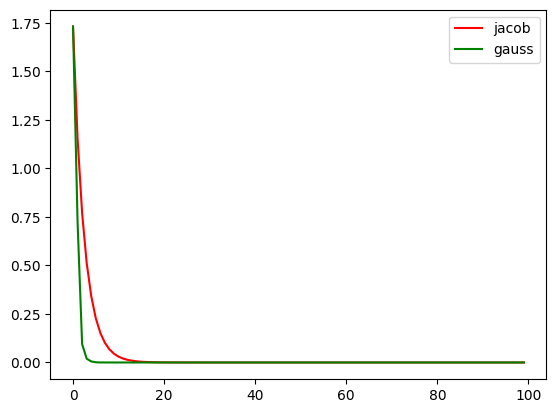

In [ ]:
plt.plot([i for i in range(iter)], diff_values_j, color='r', label='jacob')
plt.plot([i for i in range(iter)], diff_values_gs, color='g', label='gauss')
#plt.xscale("log")
plt.legend()
plt.show()

In [ ]:
rate_j = []
rate_gs = []
for i in range(len(diff_values_j)-1):
  rate_j.append(diff_values_j[i]-diff_values_j[i+1])
  rate_gs.append(diff_values_gs[i]-diff_values_gs[i+1])

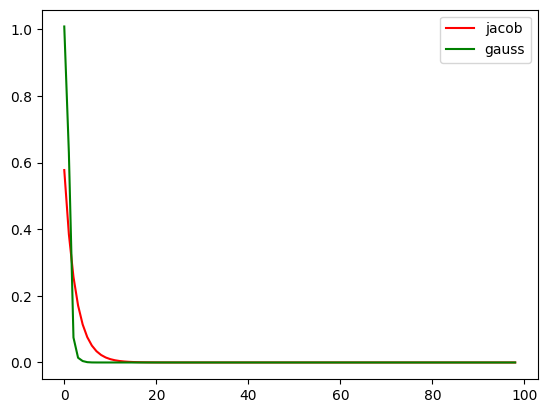

In [ ]:
plt.plot([i for i in range(iter-1)], rate_j, color='r', label='jacob')
plt.plot([i for i in range(iter-1)], rate_gs, color='g', label='gauss')
#plt.xscale("log")
plt.legend()
plt.show()

Question 4

In [ ]:
import numpy as np

In [ ]:
class RowVectorFloat():
  def __init__(self, vec):
    self.vec = vec
  def __str__(self):
    out_str = ""
    for i in self.vec:
      out_str += f"{i} "
    return out_str
  def __len__(self):
    return len(self.vec)
  def __getitem__(self, ind):
    return self.vec[ind]
  def __setitem__(self, key, newvalue):
    self.vec[key] = newvalue
  def __rmul__(self, const):
    if type(const) is int or type(const) is float:
      out_list = RowVectorFloat(self)
      for i in range(len(self)):
        out_list[i] *= const
      return out_list
    else:
      return self.__mul__(const, self)

  def __mul__(self, const):
    if type(const) is int or type(const) is float:
      out_list = RowVectorFloat(self)
      for i in range(len(self)):
        out_list[i] *= const
      return out_list
    else:
      return self.__mul__(const, self)

  def __add__(self, other):
    if len(self) != len(other):
      raise Exception('Lists of different dimensions cannot be added')
      return ['Uhoh']
    else:
      out_list = RowVectorFloat(self)
      for i in range(len(self)):
        out_list[i] += other.__getitem__(i)
      return out_list


class Polynomial(RowVectorFloat):
  def __str__(self):
    out_str = "Coefficients of the polynomial are:\n"
    for i in range(len(self)):
      out_str += f"{self.vec[i]} "
    return out_str

  def __add__(self, other): #didnt add adding of 2 polynomials
    if len(self) >= len(other):
      out_list = Polynomial(self.vec)
      for i in range(len(other)):
        out_list.vec[i] += other.vec[i]
      return out_list
    else:
      return other.__add__(self)

  def __mul__(self, const):  #didnt add multiplying of 2 polynomials
    if type(const) is int or type(const) is float:
      out_list = Polynomial(self.vec)
      for i in range(len(self)):
        out_list.vec[i] *= const
      return out_list
    else:
      out_list = Polynomial([0]*(len(self)+len(const)))
      for i in range(len(self)):
        for j in range(len(const)):
          out_list.vec[i+j] += self.vec[i]*const.vec[j]
      return out_list

  def __rmul__(self, const):  #didnt add multiplying of 2 polynomials
    if type(const) is int or type(const) is float:
      out_list = Polynomial(self.vec)
      for i in range(len(self)):
        out_list.vec[i] *= const
      return out_list
    else:
      out_list = Polynomial([0]*(len(self)+len(const)))
      for i in range(len(self)):
        for j in range(len(const)):
          out_list.vec[i+j] += self.vec[i]*const.vec[j]
      return out_list

  def __sub__(self, other):
    if len(self) != len(other):
      raise Exception('Lists of different dimensions cannot be subbed')
      return ['Uhoh']
    else:
      return self.__add__(other*(-1))


  def __getitem__(self, pt):
    ans = 0
    for i in range(len(self)):
      ans += self.vec[i]*(pow(pt, i))
    return ans

  def show(self, a, b):
    steps = np.arange(a, b, (b-a)/100)
    y = [self[i] for i in steps]
    plt.plot(steps, y, color='r')
    plt.show()

  def fitViaMatrixMethod(self, pts):
    b = [pt[1] for pt in pts]
    x_pts = [pt[0] for pt in pts]
    a = []
    for i in range(len(pts)):
      curr_temp =[]
      for j in range(len(pts)):
        curr_temp.append(x_pts[i]**j)
      a.append(curr_temp)
    x = np.linalg.solve(a, b)
    new_poly = []
    for ele in x:
      new_poly.append(ele)
    new_p = Polynomial(new_poly)
    self.vec = new_p.vec
    new_p.show(min(x_pts)-1, max(x_pts)+1)
    # a_new = min(x_pts)-1
    # b_new = max(x_pts)+1
    # steps = np.arange(a_new, b_new, (b_new-a_new)/100)
    # y = [self[i] for i in steps]
    # plt.plot(steps, y, color='r')
    # plt.show()


  def fitViaLagrangePoly(self, pts):
    list_of_poly = []
    x_pts = [pt[0] for pt in pts]
    for j in range(len(pts)):
      temp_list = Polynomial([1]*len(pts))
      for i in range(len(pts)):
        if i!=j:
          temp_list*(Polynomial([-pts[i][0]/(pts[j][0]-pts[i][0]), -1/(pts[j][0]-pts[i][0])]))
    list_of_poly.append(temp_list)
    final_poly = Polynomial([0]*len(pts))
    self.vec = final_poly.vec
    for i in range(len(list_of_poly)):
      final_poly += pts[i][1]*(list_of_poly[i])
    final_poly.show(min(x_pts)-1, max(x_pts)+1)


In [ ]:
p = Polynomial([1, 2, 3])
print(p)

Coefficients of the polynomial are:
1 2 3 


In [ ]:
p1 = Polynomial([1, 2, 3])
p2 = Polynomial([3, 2, 1])
p3 = p1 + p2
print(p3)


Coefficients of the polynomial are:
4 4 4 


In [ ]:
p1 = Polynomial([1, 2, 3])
p2 = Polynomial([3, 2, 1])
p3 = p1 - p2
print(p3)


Coefficients of the polynomial are:
-2 0 2 


In [ ]:
p1 = Polynomial([1, 2, 3])
p2 = (-0.5)*p1
print(p2)


Coefficients of the polynomial are:
-0.5 -1.0 -1.5 


In [ ]:
p1 = Polynomial([-1, 1])
p2 = Polynomial([1, 1, 1])
p3 = p1 + p2
print(p3)


Coefficients of the polynomial are:
0 2 1 


In [ ]:
p1 = Polynomial([-1, 1])
p2 = Polynomial([1, 1, 1])
p3 = p1 * p2
print(p3)


Coefficients of the polynomial are:
-1 0 0 1 0 


In [ ]:
p = Polynomial([1, 2, 3])
print(p[2])

17


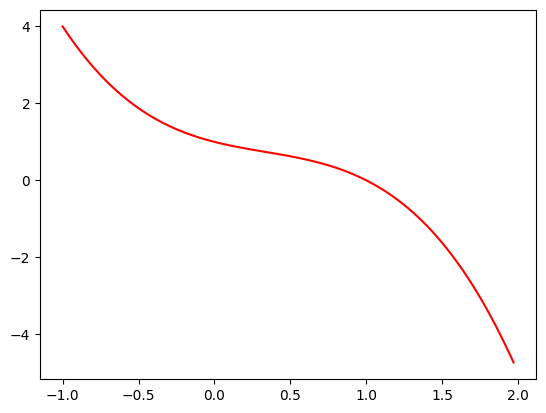

In [ ]:
p = Polynomial([1, -1, 1, -1])
p.show(-1, 2)


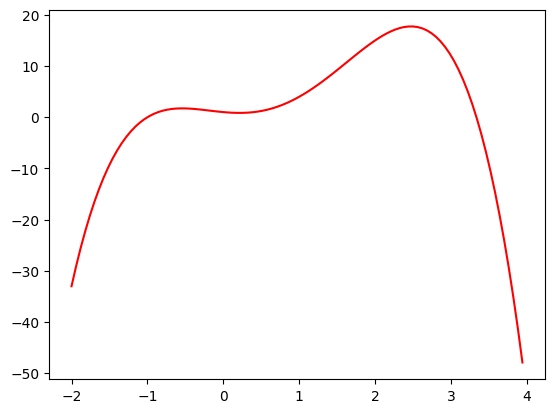

12.000000000000014


In [ ]:
p = Polynomial([])
p.fitViaMatrixMethod([(1,4), (0,1), (-1, 0), (2, 15), (3,12)])
print(p[3])

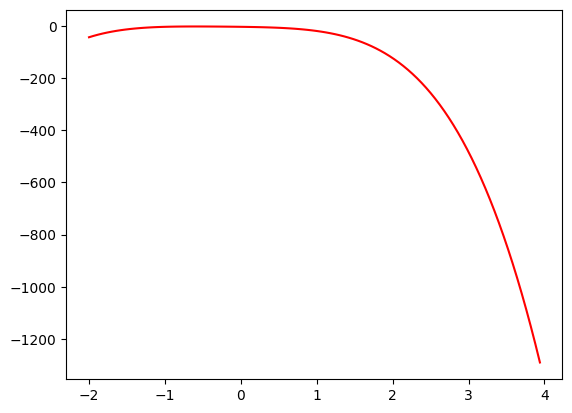

-484


In [ ]:
p = Polynomial([])
p.fitViaLagrangePoly([(1,-4), (0,1), (-1, 4), (2, 4), (3,1)])
print(p[3])


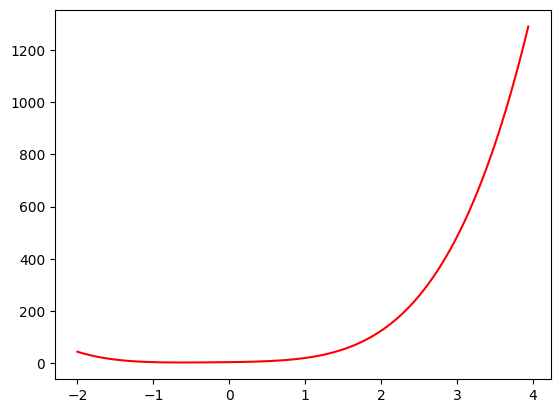

In [ ]:
p = Polynomial([])
p.fitViaLagrangePoly([(1,4),(0,1),(-1,0),(2,15),(3,12)])

Question 5

In [ ]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# fig = plt.figure()
# axis = plt.axes(xlim =(-50, 50),
#                 ylim =(-50, 50))

# line, = axis.plot([], [], lw = 2)

# # what will our line dataset
# # contain?
# def init():
#     line.set_data([], [])
#     return line,

# # initializing empty values
# # for x and y co-ordinates
# xdata, ydata = [], []

# # animation function
# # def animate(i):
# #     # t is a parameter which varies
# #     # with the frame number
# #     t = 0.1 * i

# #     # x, y values to be plotted
# #     x = t * np.sin(t)
# #     y = t * np.cos(t)

# #     # appending values to the previously
# #     # empty x and y data holders
# #     xdata.append(x)
# #     ydata.append(y)
# #     line.set_data(xdata, ydata)

# #     return line,

# # calling the animation function
# anim = animation.FuncAnimation(fig, animate,
#                             init_func = init,
#                             frames = 500,
#                             interval = 20,
#                             blit = True)

# # saves the animation in our desktop
# anim.save('growingCoil.mp4', writer = 'ffmpeg', fps = 30)

In [ ]:
# # importing all necessary libraries
# from itertools import count
# import random
# import matplotlib
# from matplotlib import animation
# from scipy import interpolate as intpl
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# #%matplotlib qt

# def animate(i):
#   y1 = [math.tan(j)*math.sin(30*j)*pow(math.e, j) for j in np.arange(0, 1, 1/1000)]
#   x_samples = [j/i for j in range(i)]
#   y_samples = [math.tan(j)*math.sin(30*j)*pow(math.e,j) for j in x_samples]
#   cs = intpl.CubicSpline(x_samples,y_samples)
# 	ak = intpl.Akima1DInterplator(x_samples, y_samples)
#   bc = intpl.barycentric_interpolate(x_samples, y_samples)
#   xp = np.arange(0,1,0.01)
# 	axes.plot(xp, cs(xp), color="red")
# 	axes.plot(xp, ak(xp), color="gray")
# 	axes.plot(xp, bc(xp), color="blue")

# # add random points for each line
# l1 = [random.randint(-20, 4)+(points**1.88)/(random.randint(13, 14))
# 	for points in range(0, 160, 2)]
# l2 = [random.randint(0, 9)+(points**1.9)/(random.randint(9, 11))
# 	for points in range(0, 160, 2)]
# l3 = [random.randint(-10, 10)-(points**1.4)/(random.randint(9, 12))
# 	for points in range(0, 160, 2)]
# l4 = [random.randint(-5, 10)-(points**1.1)/(random.randint(7, 12))
# 	for points in range(0, 160, 2)]

# myvar = count(0, 3)

# # subplots() function you can draw
# # multiple plots in one figure
# fig, axes = plt.subplots(figsize=(10, 5))

# # set limit for x and y axis
# axes.set_ylim(-4, 4)
# axes.set_xlim(-0.1, 1.1)

# # style for plotting line
# plt.style.use("ggplot")

# # create 5 list to get store element
# # after every iteration
# x1, y1, y2, y3, y4 = [], [], [], [], []
# myvar = count(0, 3)




# # set ani variable to call the
# # function recursively
# anim = FuncAnimation(fig, animate, interval=30)


In [ ]:
# importing all necessary libraries
from itertools import count
import random
import matplotlib
from matplotlib import animation
from scipy import interpolate as intpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#%matplotlib qt




In [ ]:
# def animate(i):
#   y1 = [math.tan(j)*math.sin(30*j)*pow(math.e, j) for j in np.arange(0, 1, 1/1000)]
#   x_samples = [j/i for j in range(i)]
#   y_samples = [math.tan(j)*math.sin(30*j)*pow(math.e,j) for j in x_samples]
#   cs = intpl.CubicSpline(x_samples,y_samples)
# 	ak = intpl.Akima1DInterplator(x_samples, y_samples)
#   bc = intpl.barycentric_interpolate(x_samples, y_samples)
#   xp = np.arange(0,1,0.01)
# 	axes.plot(xp, cs(xp), color="red")
# 	axes.plot(xp, ak(xp), color="gray")
# 	axes.plot(xp, bc(xp), color="blue")


In [ ]:
def animate(i):
  axes.clear()
  y1 = [math.tan(j)*math.sin(30*j)*pow(math.e, j) for j in np.arange(0, 1, 1/1000)]
  x_samples = [j/i for j in range(i)]
  y_samples = [math.tan(j)*math.sin(30*j)*pow(math.e,j) for j in x_samples]
  x_in = np.linspace(min(x_samples), max(x_samples), num=i)
  cs = intpl.CubicSpline(x_samples,y_samples)
  ak = intpl.Akima1DInterpolator(x_samples, y_samples)
  bc = intpl.barycentric_interpolate(x_samples, y_samples, x_in)
  xp = np.arange(0,1,0.01)
  #print(type(cs(xp)))
  #print(bc)
  line1, =axes.plot(xp, cs(xp), color="red", label="Cubic Spline")
  line2, =axes.plot(xp, ak(xp), color="blue", label="akima")
  line3, =axes.plot(x_in, bc, color="gray", label="Barycentric")
  first_legend = axes.legend(handles =[line1, line2, line3],  loc ='upper right')
  axes.add_artist(first_legend)
  plt.legend()
  plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/drive'

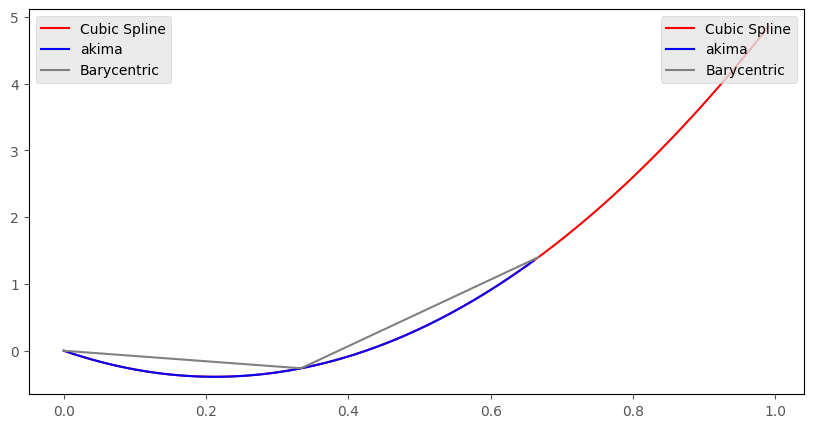

In [ ]:

# # add random points for each line
# l1 = [random.randint(-20, 4)+(points**1.88)/(random.randint(13, 14))
# 	for points in range(0, 160, 2)]
# l2 = [random.randint(0, 9)+(points**1.9)/(random.randint(9, 11))
# 	for points in range(0, 160, 2)]
# l3 = [random.randint(-10, 10)-(points**1.4)/(random.randint(9, 12))
# 	for points in range(0, 160, 2)]
# l4 = [random.randint(-5, 10)-(points**1.1)/(random.randint(7, 12))
# 	for points in range(0, 160, 2)]

myvar = count(0, 3)

# subplots() function you can draw
# multiple plots in one figure
fig, axes = plt.subplots(figsize=(10, 5))

# set limit for x and y axis
axes.set_ylim(-4, 4)
axes.set_xlim(-0.1, 1.1)

# style for plotting line
plt.style.use("ggplot")

# create 5 list to get store element
# after every iteration
x1, y1, y2, y3, y4 = [], [], [], [], []
myvar = count(0, 3)




# set ani variable to call the
# function recursively
anim = FuncAnimation(fig, animate,frames=range(3, 50), interval=3000)
anim.save('/drive/MyDrive/CVs/iters.mp4', writer = 'ffmpeg', fps = 10)

In [ ]:
anim.save('drive/MyDrive/CVs/iters.mp4', writer = 'ffmpeg', fps = 10)

In [ ]:
import random

In [ ]:
x_samples = []
y_samples = []

In [ ]:
coords = [(0, 0), (2, 0), (1, 3**0.5)]

In [ ]:
def animate1(i):
  axes.clear()
  selected_coords = random.sample(coords, 2)
  coords.append(((selected_coords[0][0]+selected_coords[1][0])/2, (selected_coords[0][1]+selected_coords[1][1])/2))
  x_samples = [coords[i][0] for i in range(len(coords))]
  y_samples = [coords[i][1] for i in range(len(coords))]
  if i%10==0:
    plt.plot(x_samples, y_samples, 'o', color="red",  marker=".", markersize=2)
    plt.legend()
    plt.show()

In [ ]:
anim = FuncAnimation(fig, animate1, interval=30000)


<ipython-input-70-a632174a19e9>:1: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(fig, animate1, interval=30000)


In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')

<ipython-input-69-eabd82233411>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_samples, y_samples, 'o', color="red",  marker=".", markersize=2)


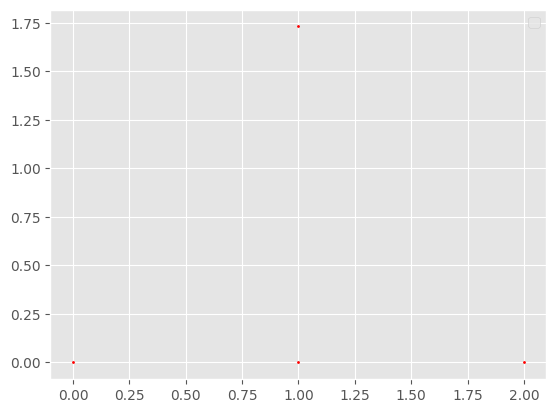

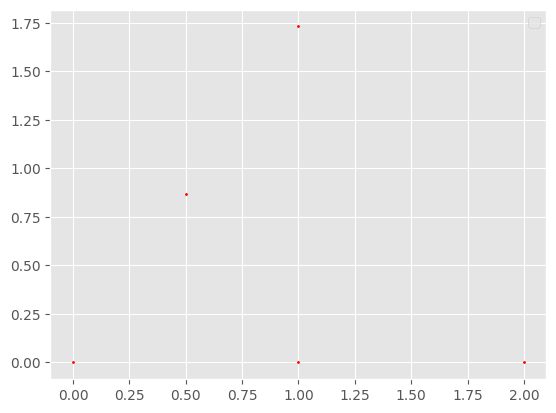

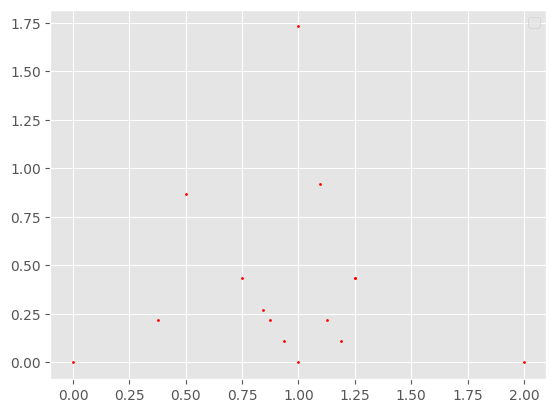

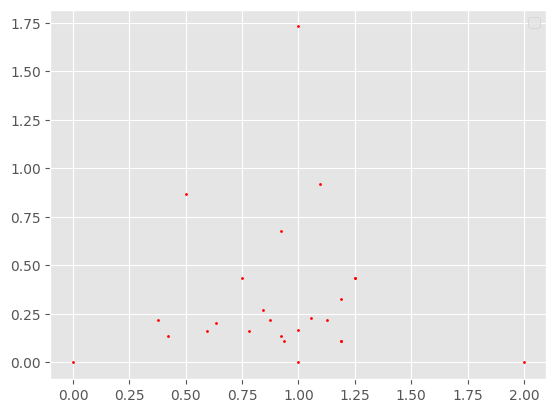

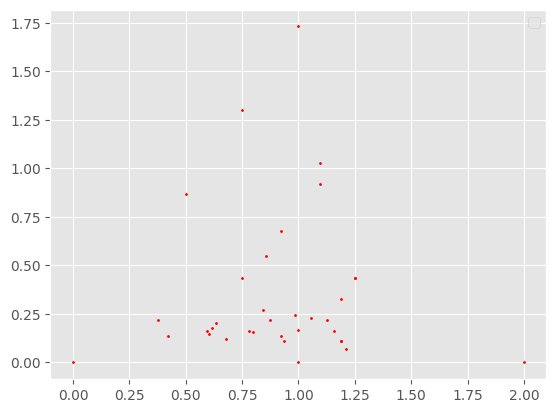

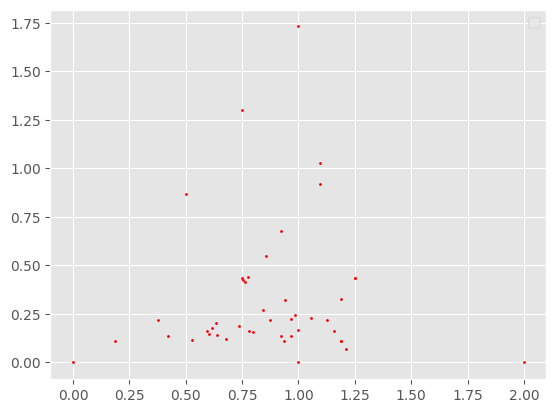

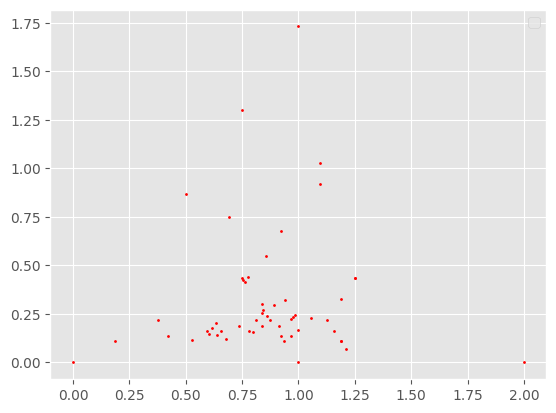

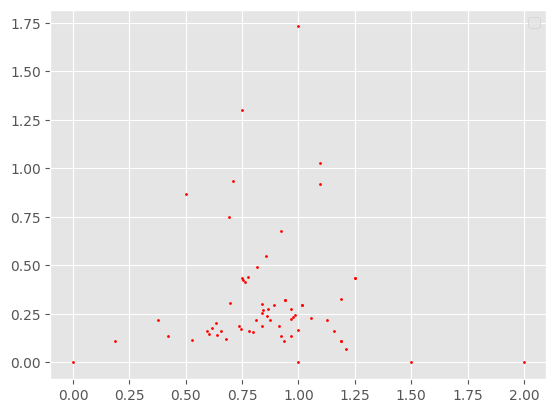

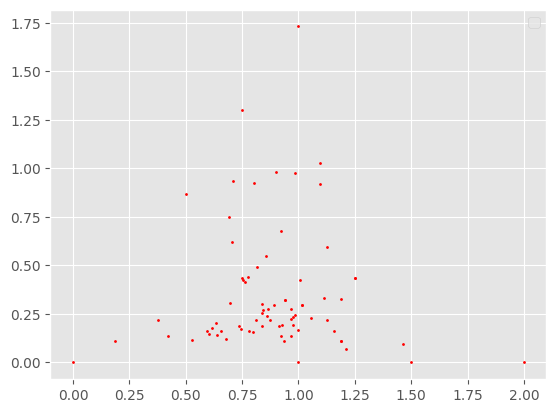

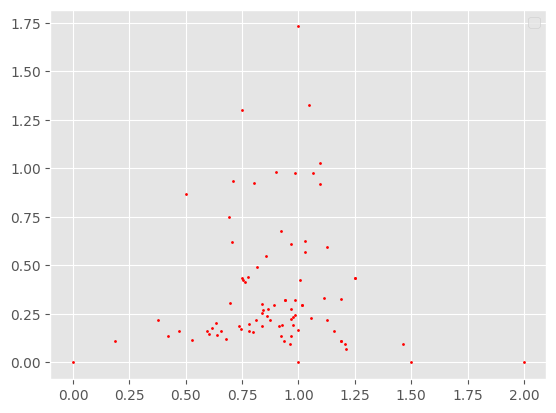

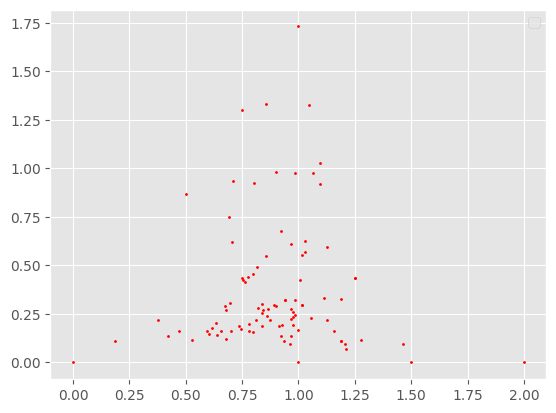

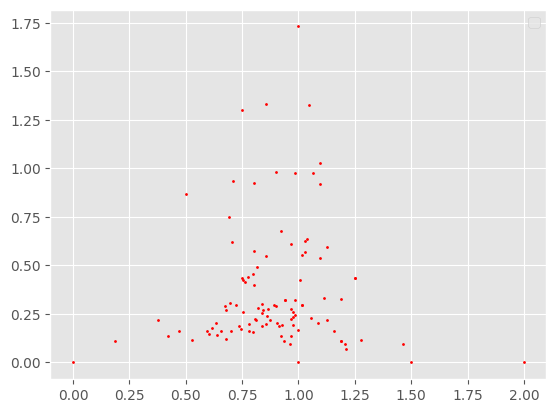

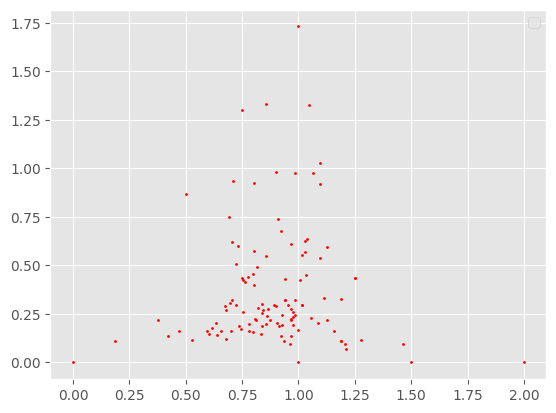

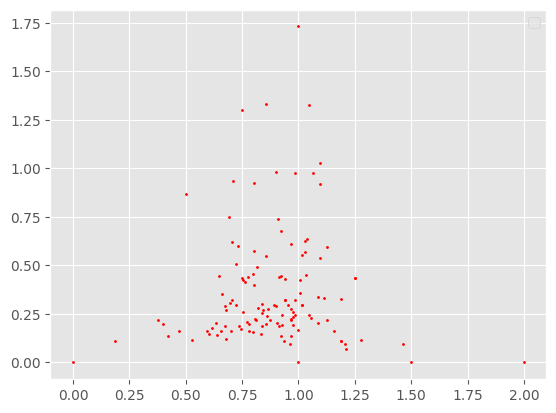

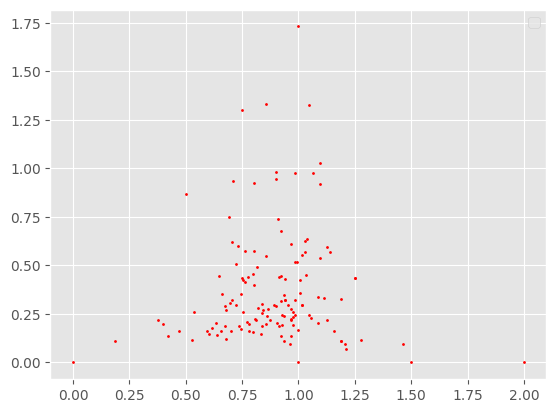

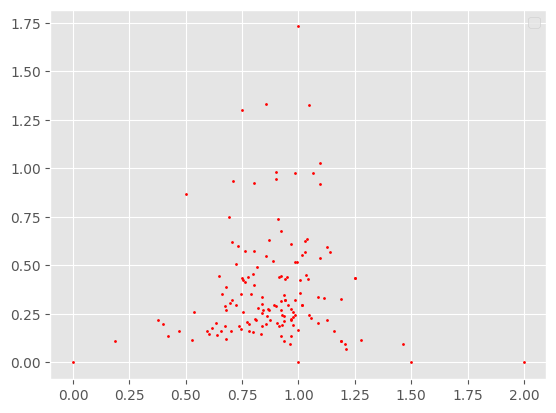

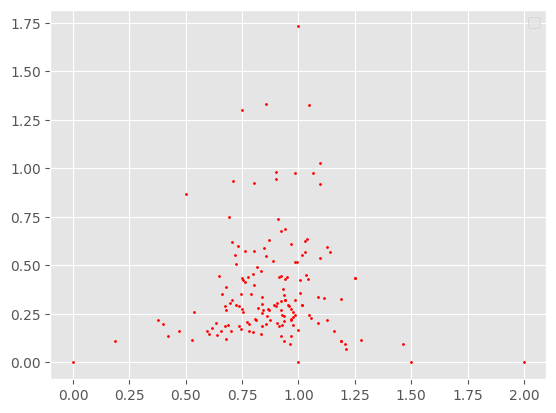

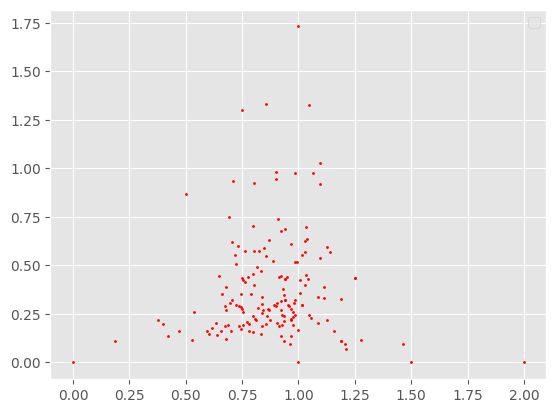

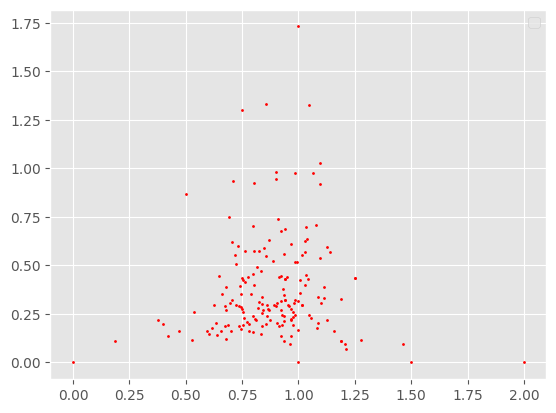

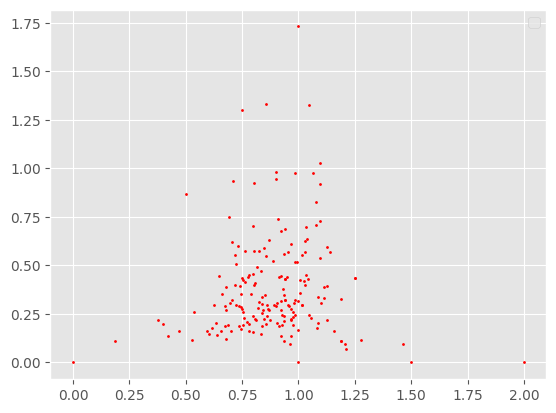

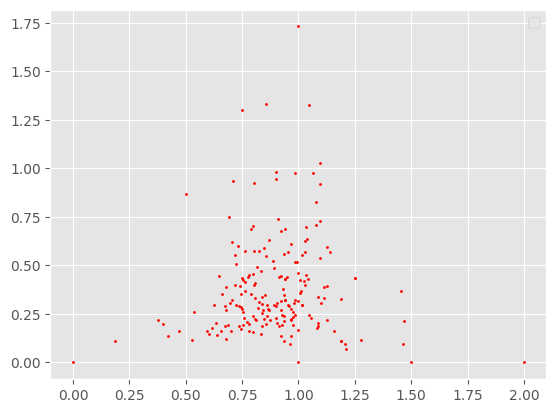

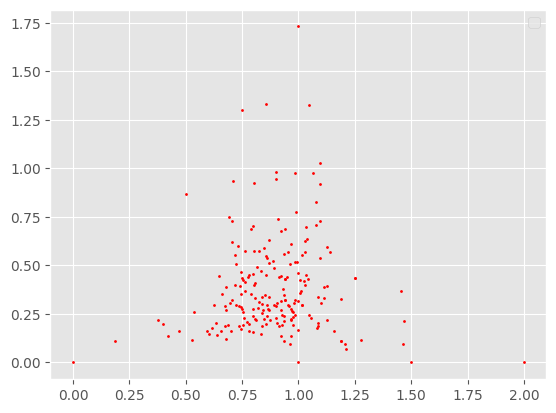

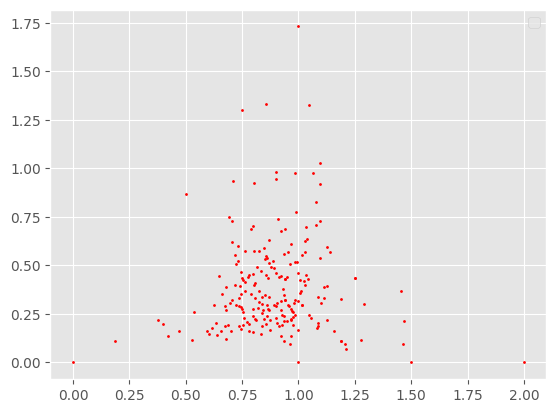

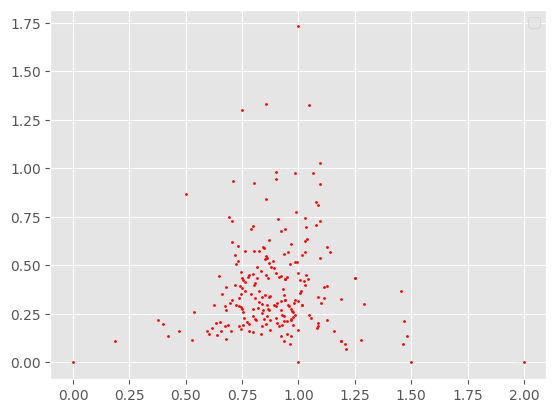

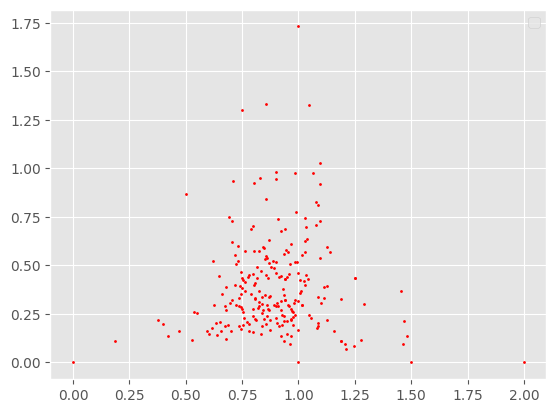

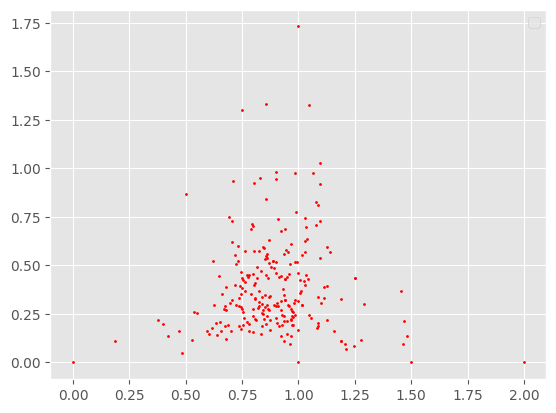

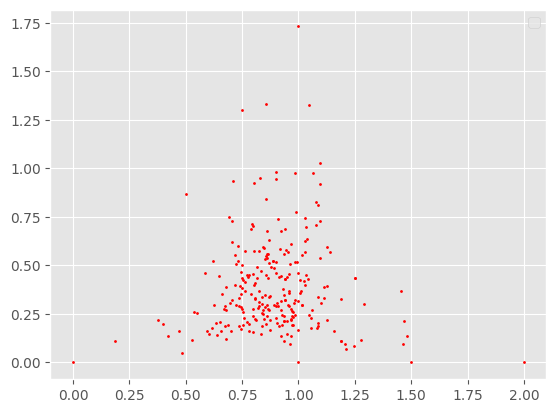

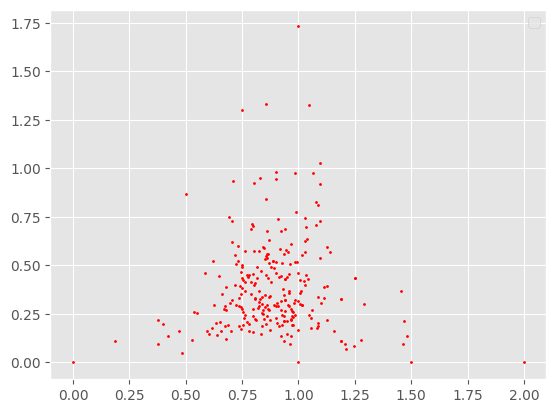

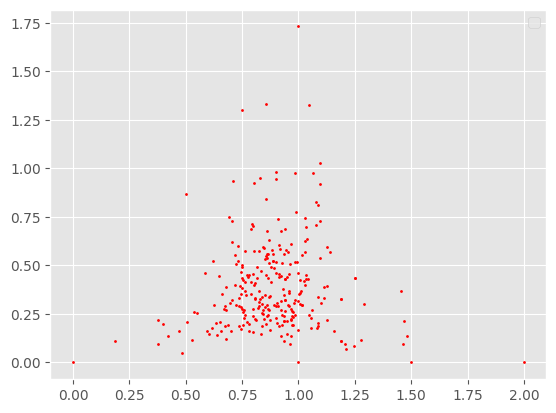

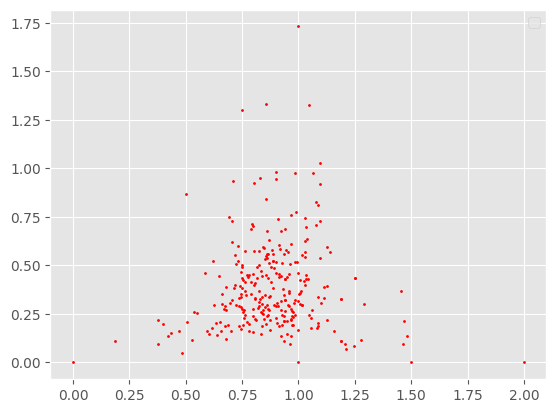

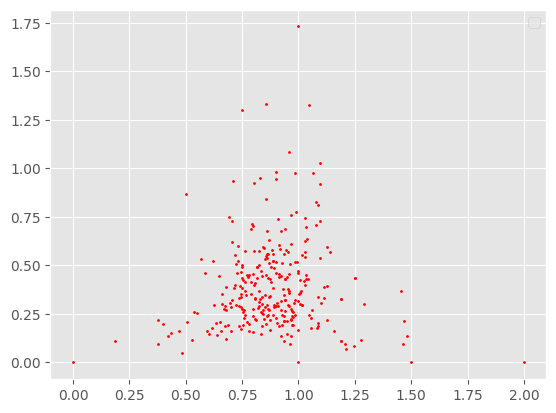

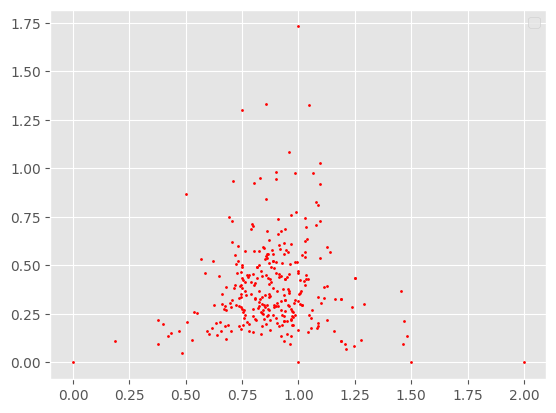

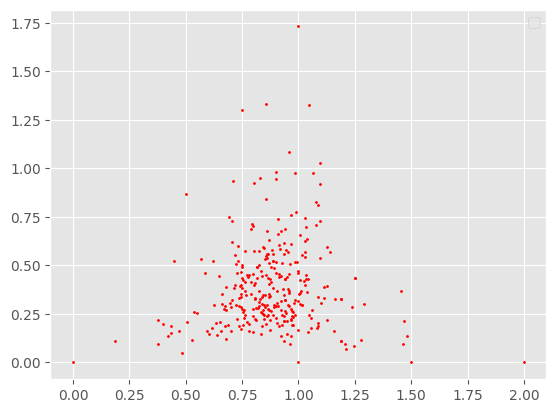

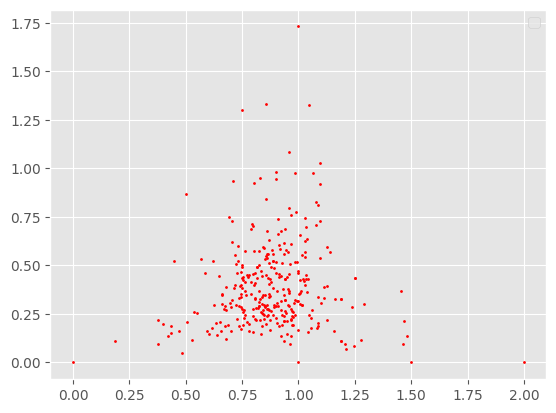

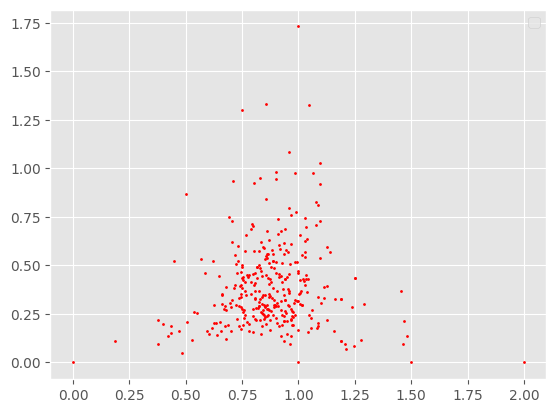

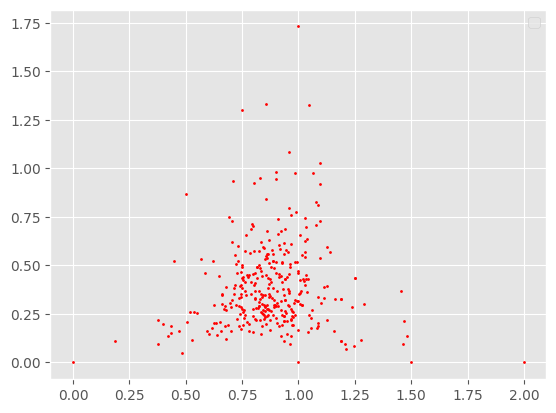

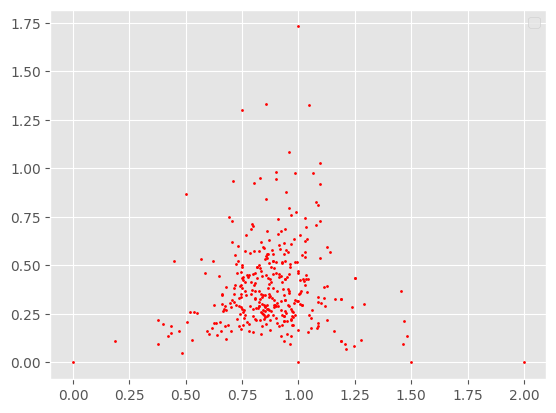

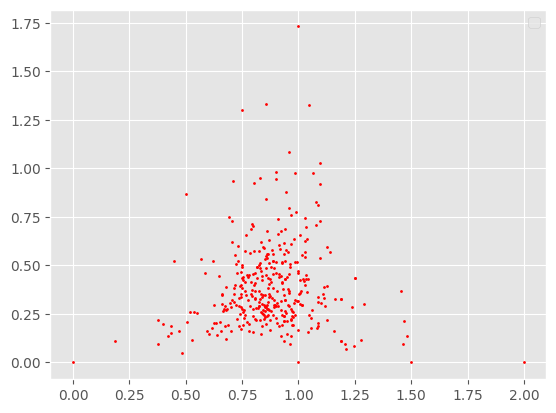

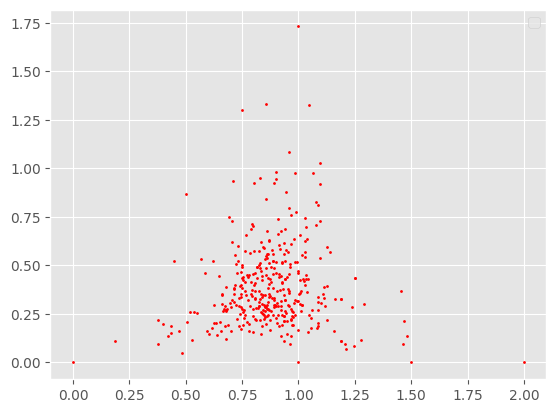

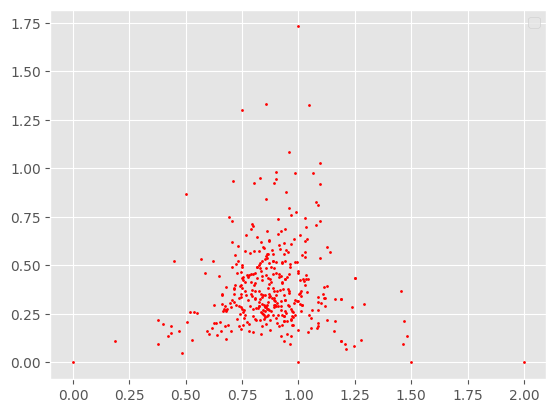

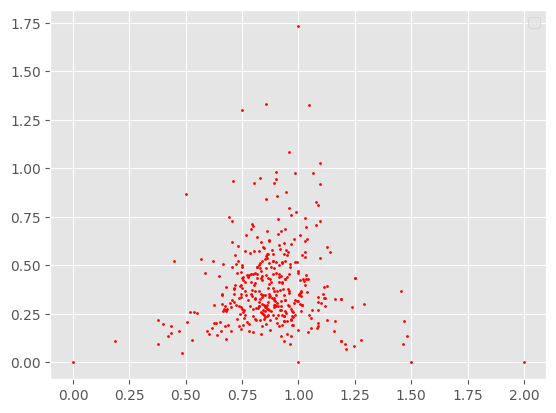

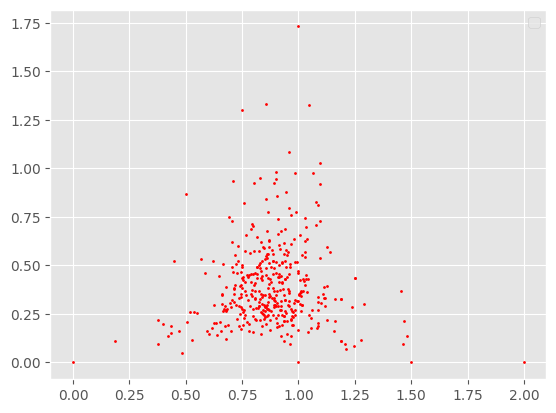

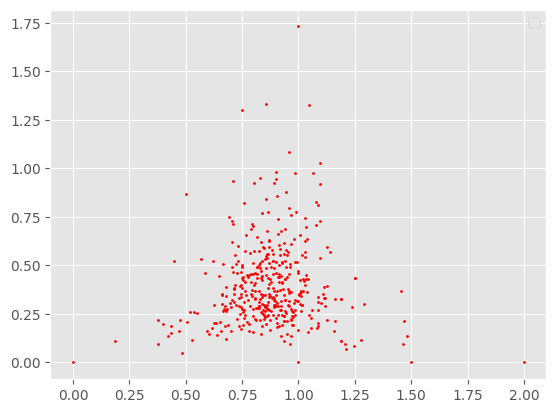

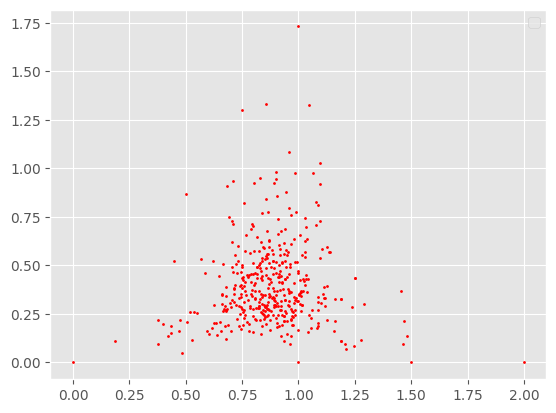

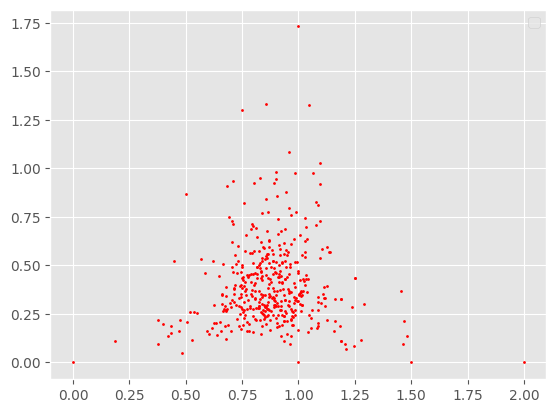

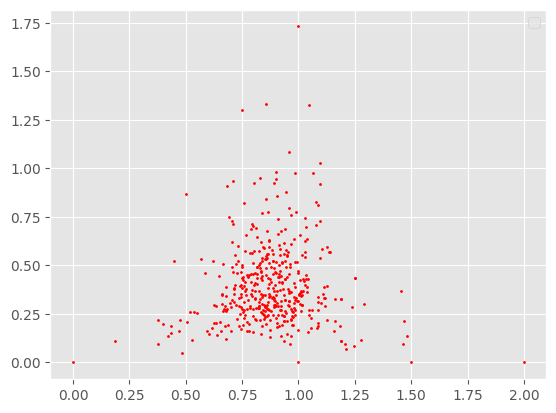

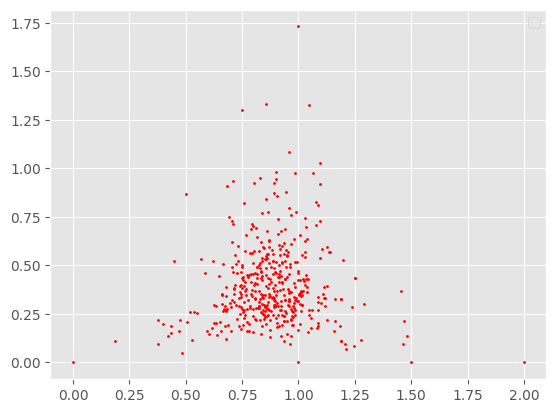

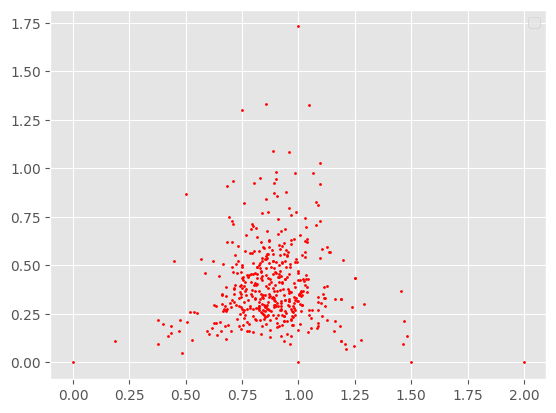

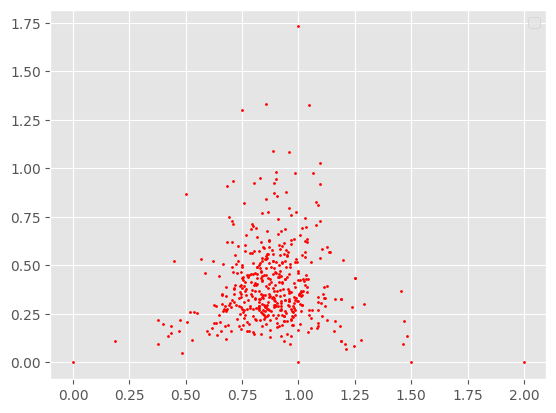

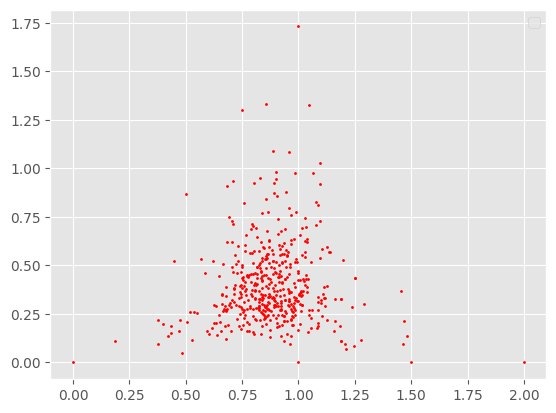

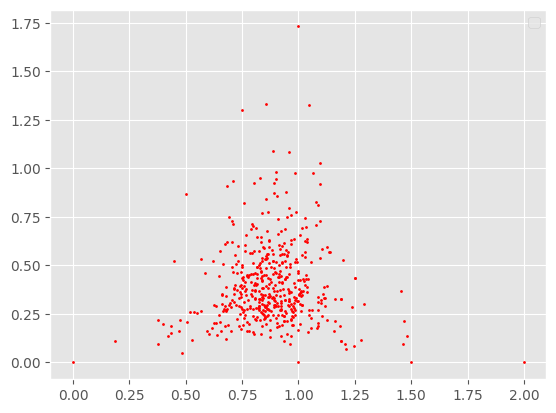

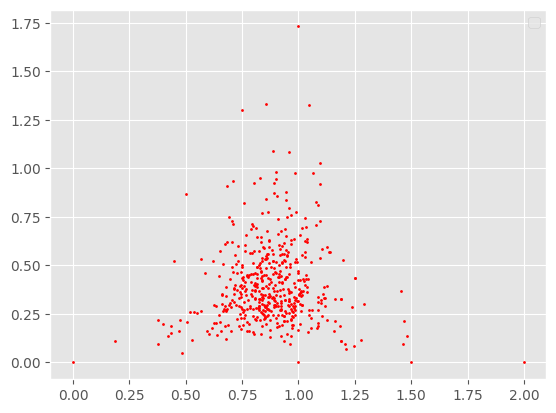

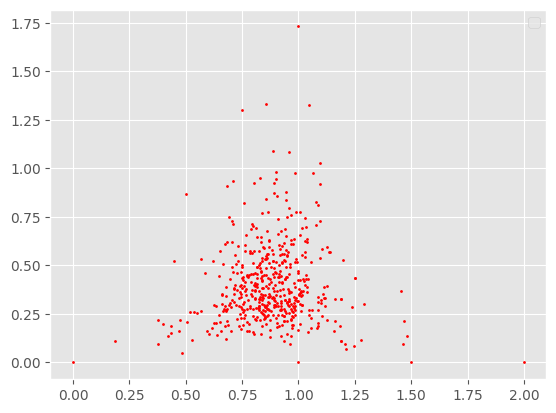

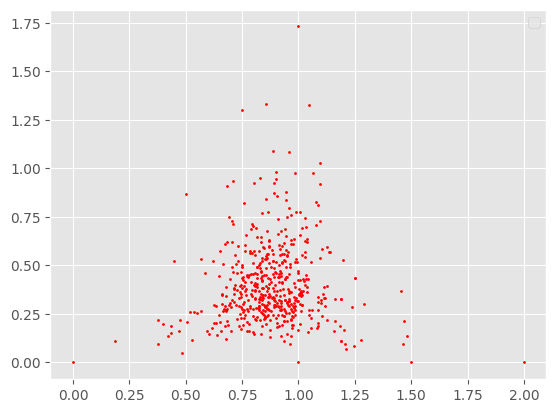

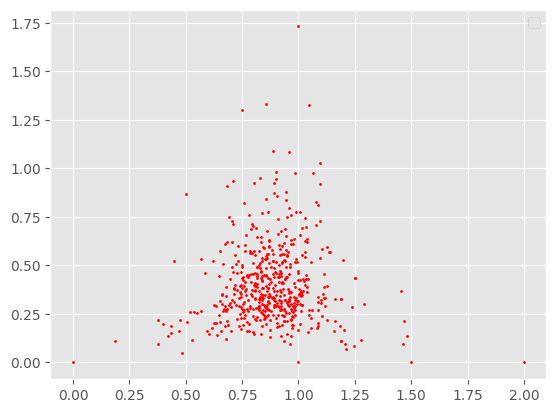

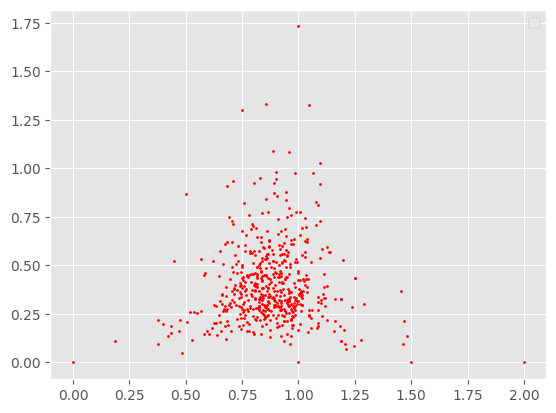

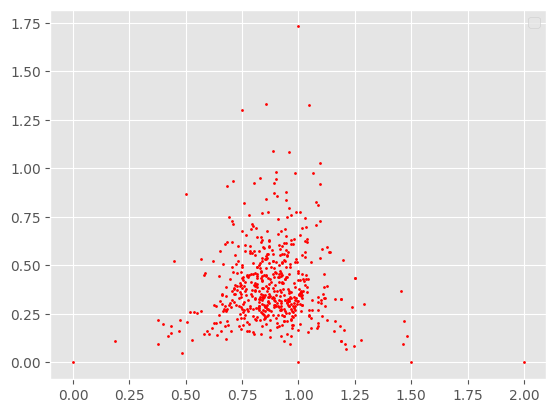

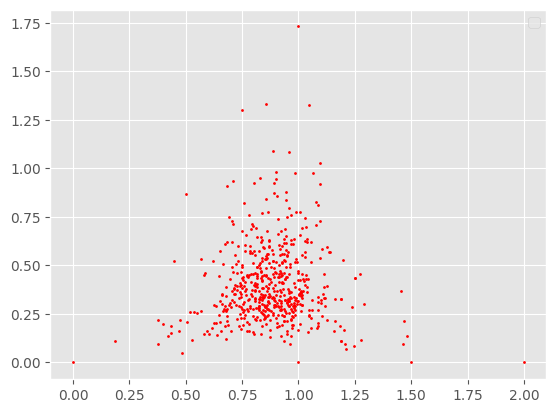

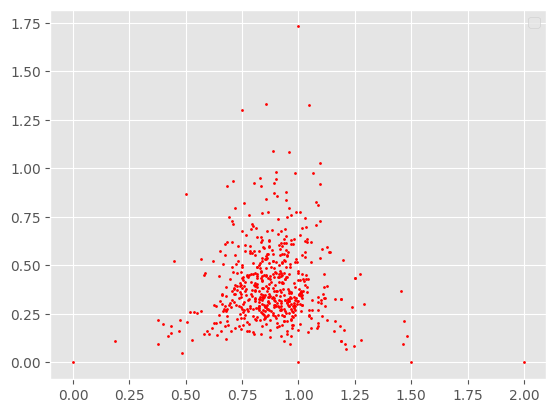

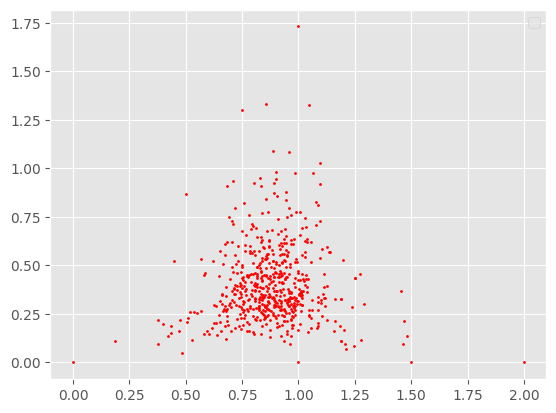

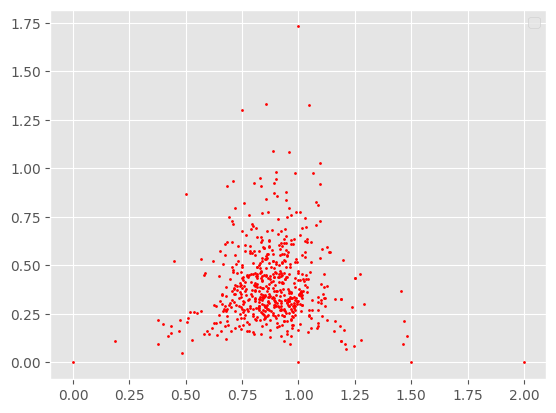

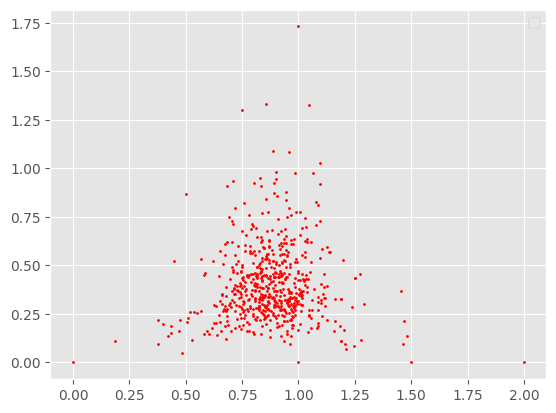

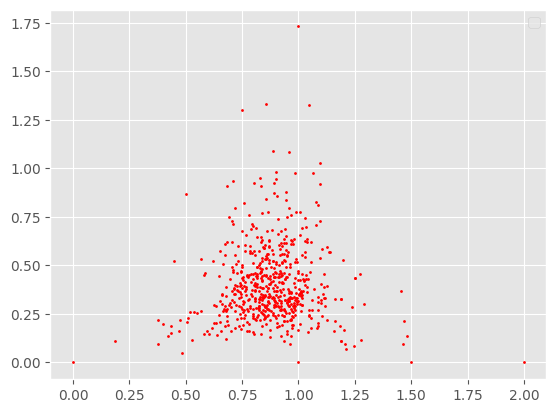

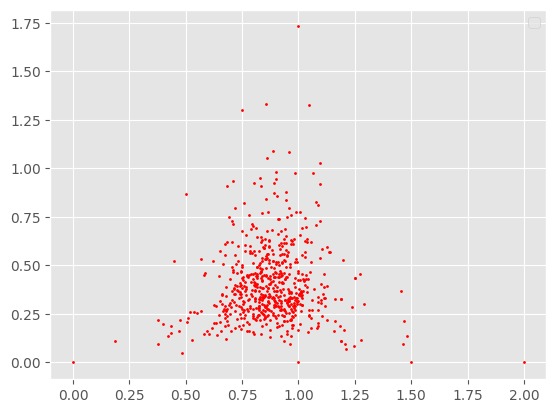

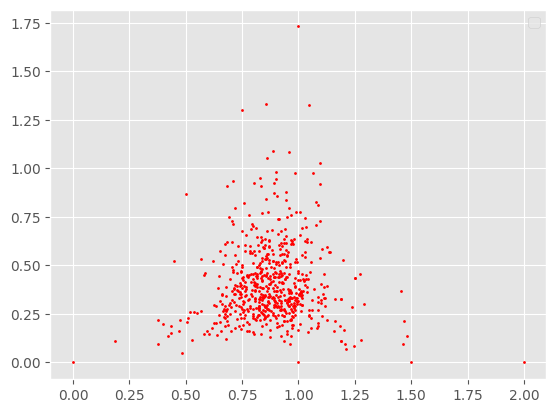

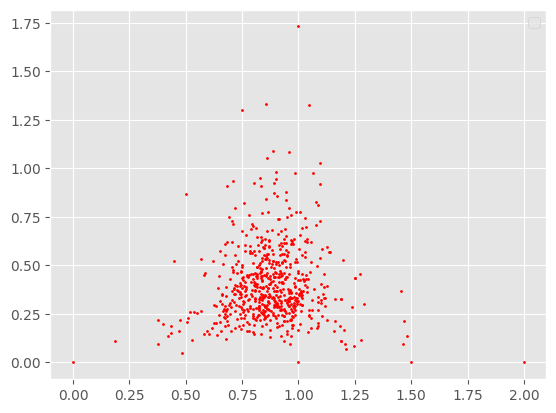

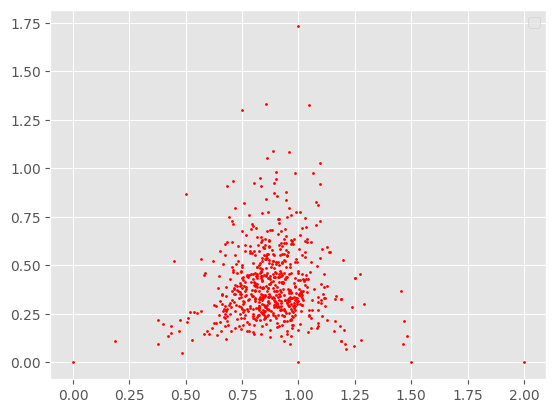

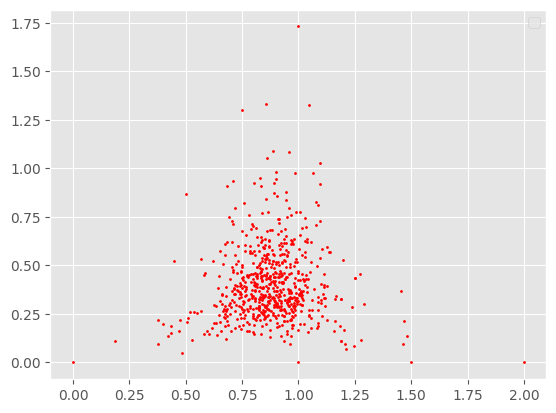

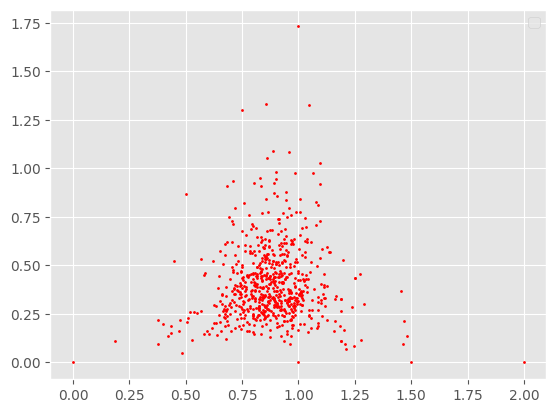

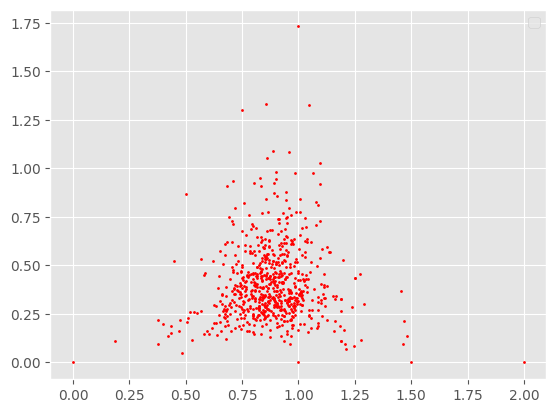

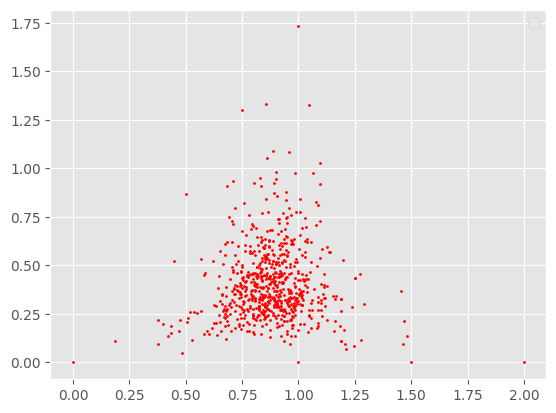

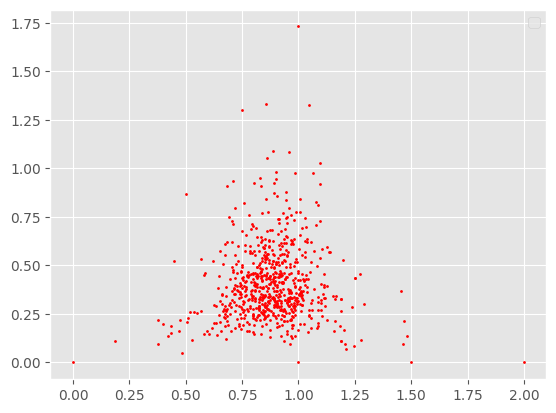

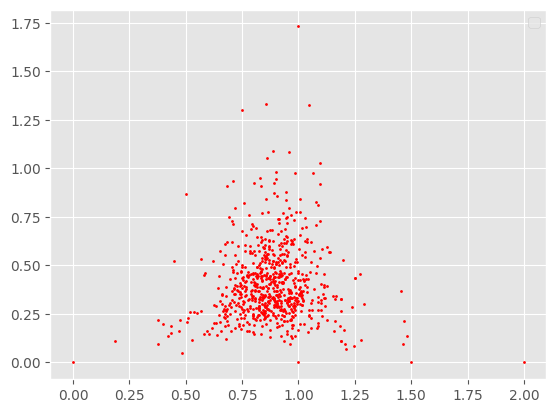

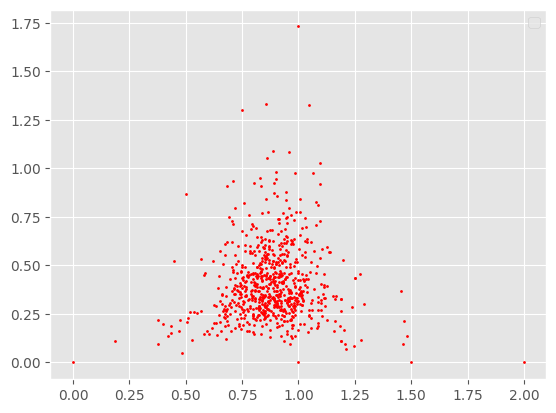

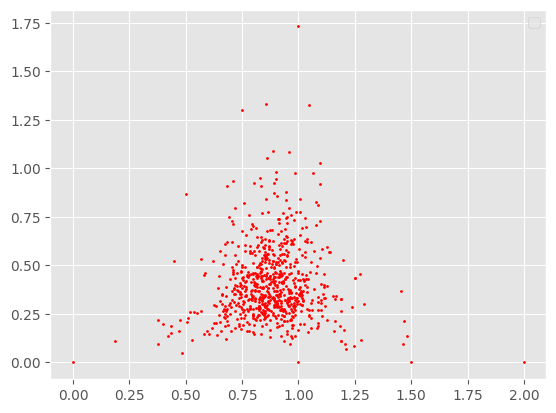

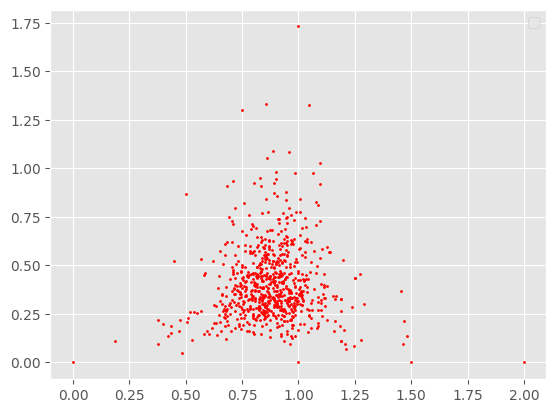

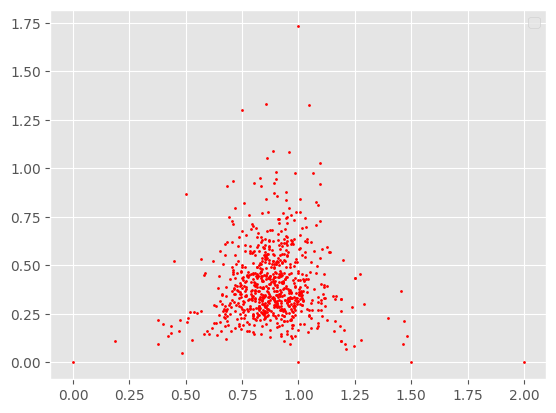

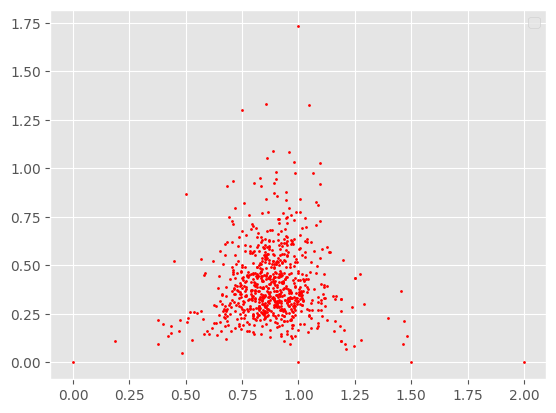

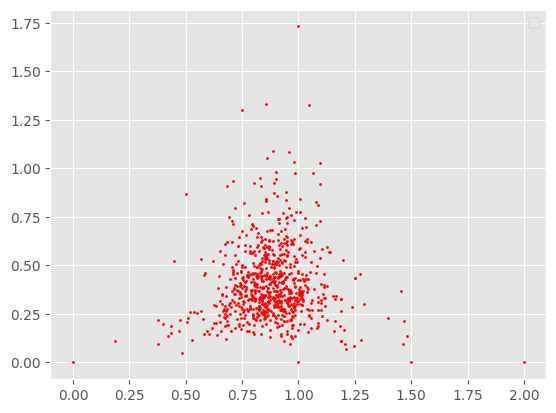

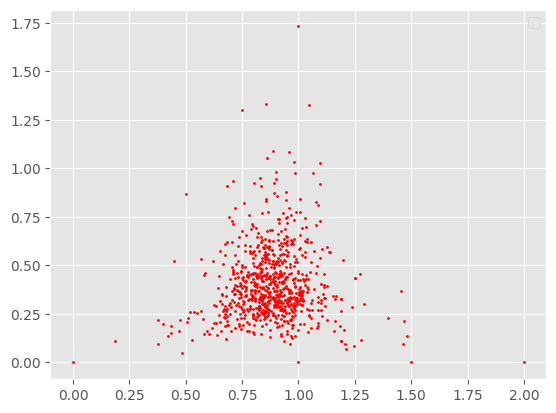

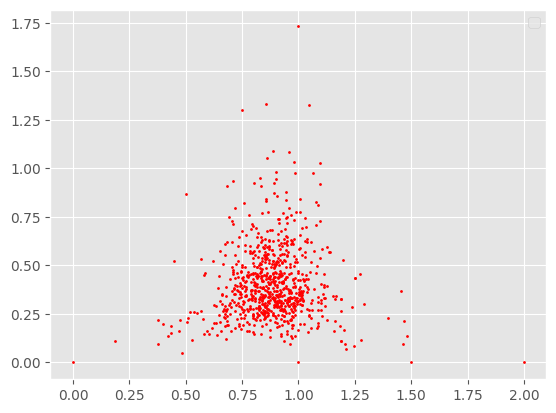

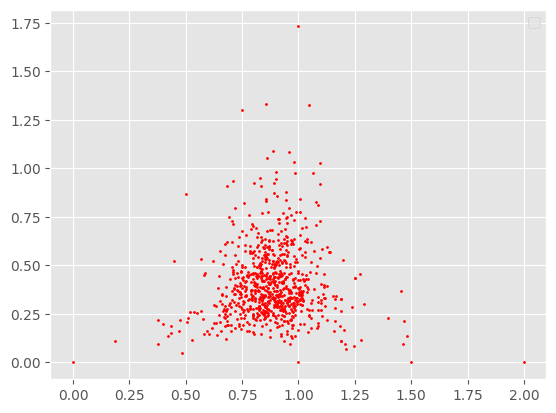

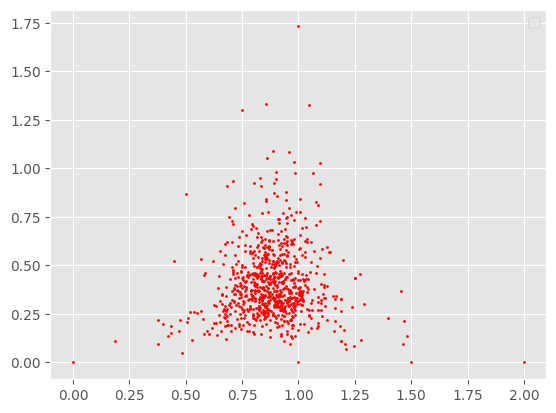

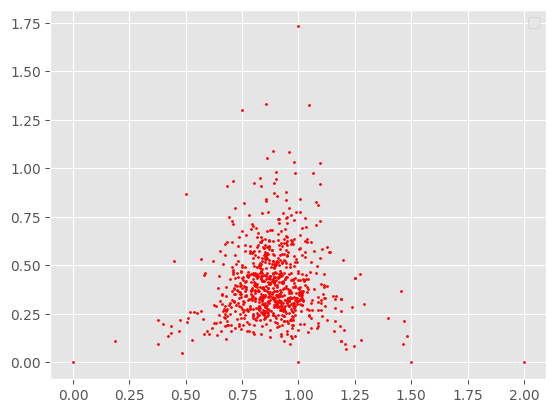

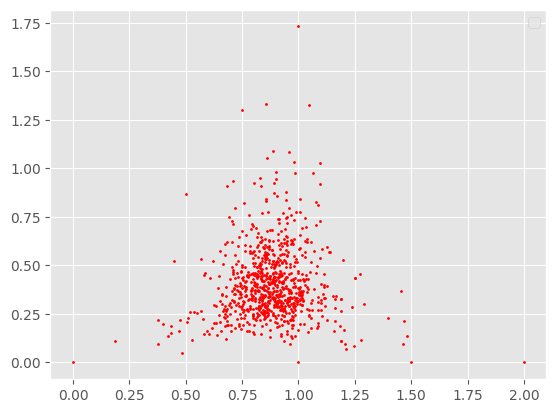

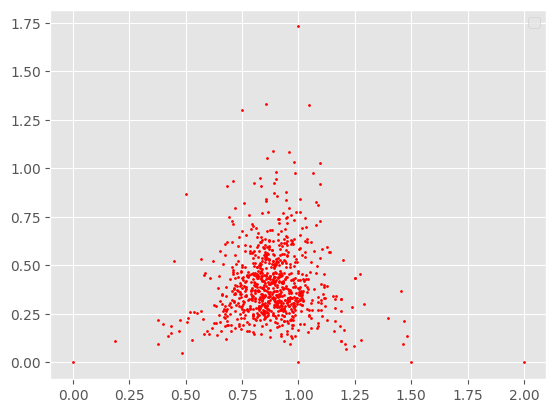

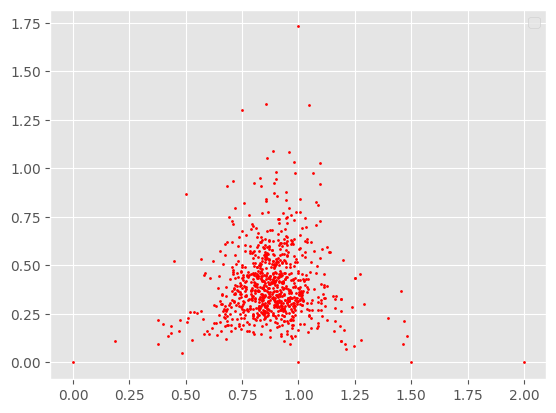

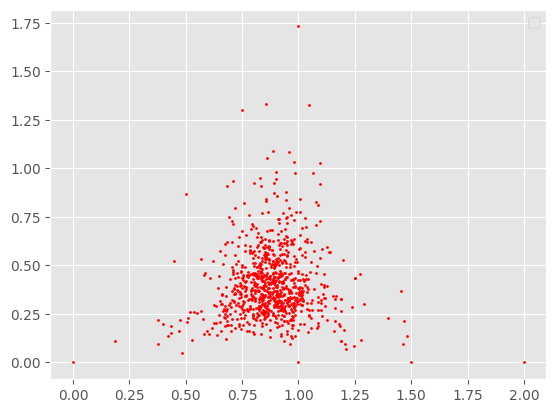

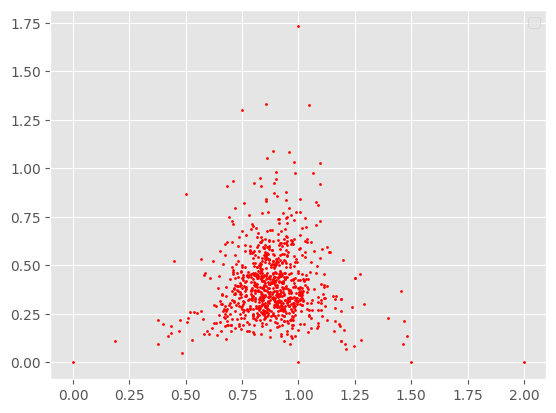

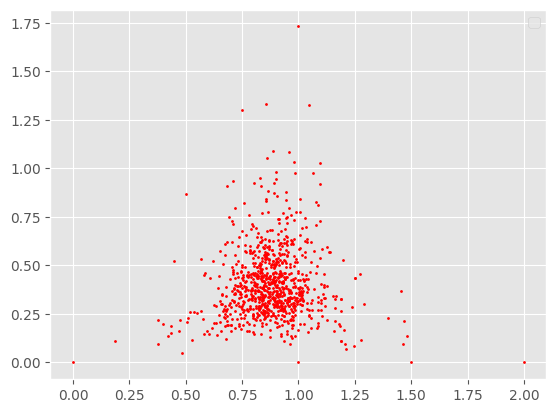

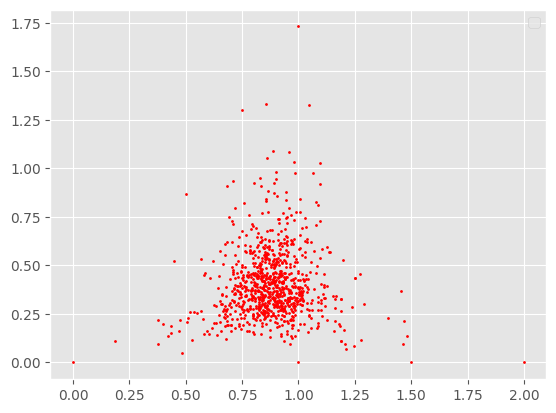

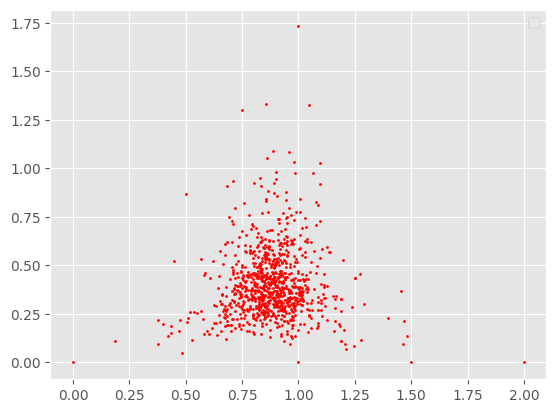

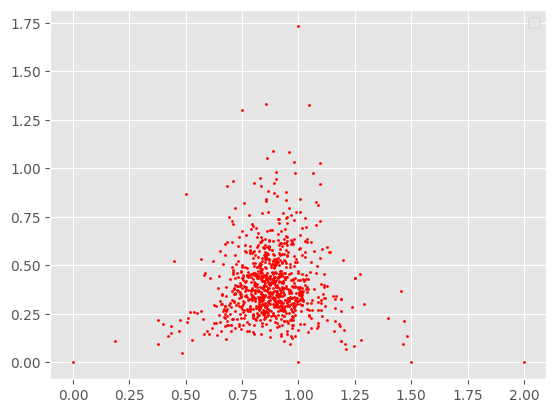

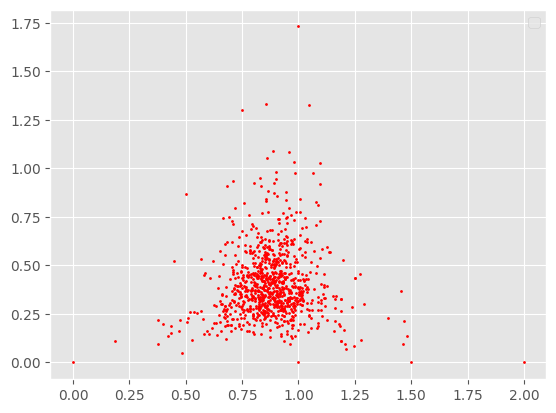

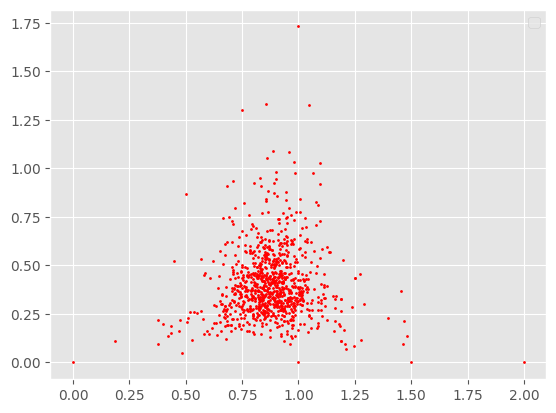

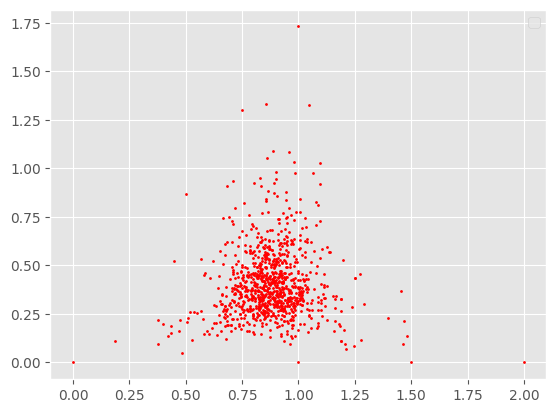

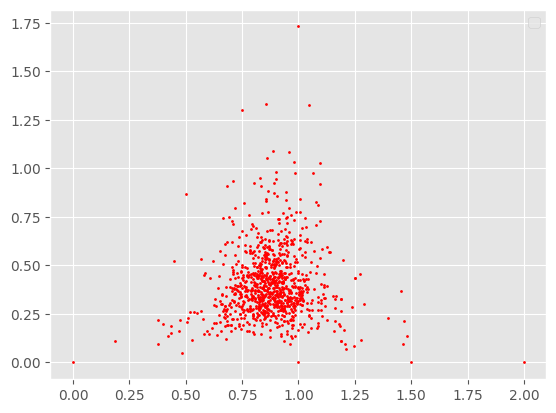

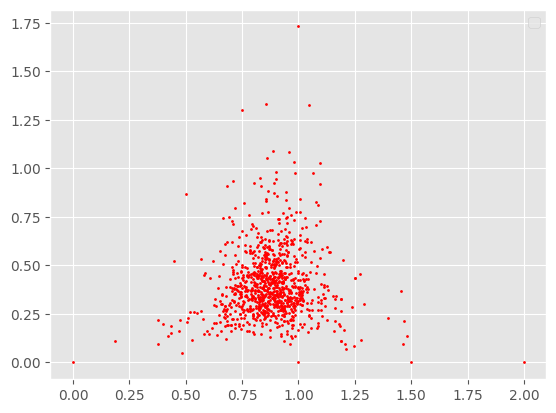

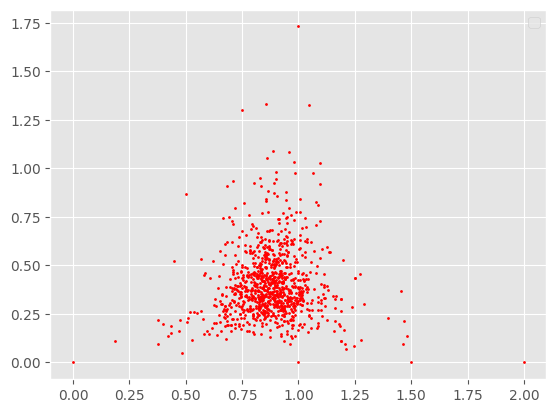

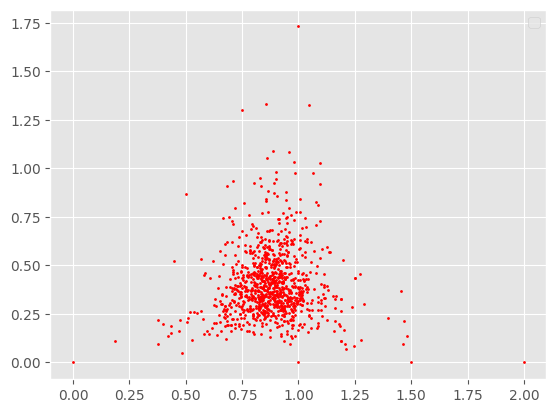

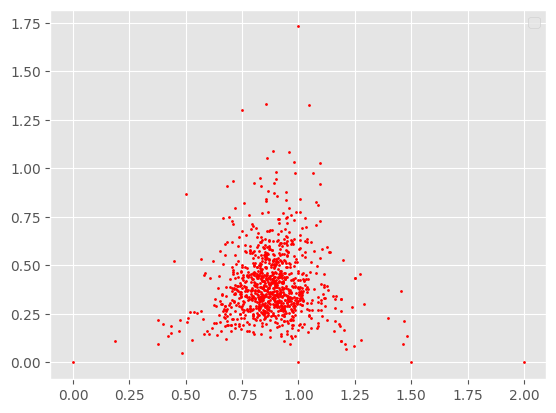

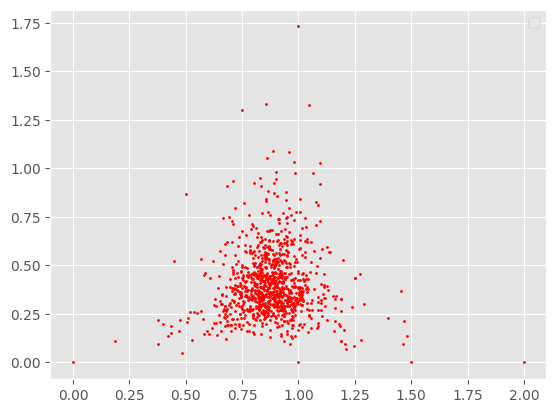

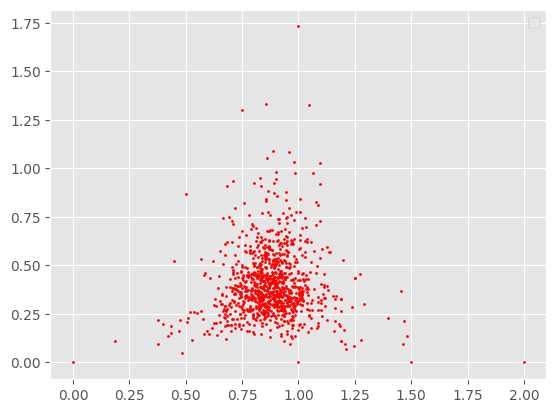

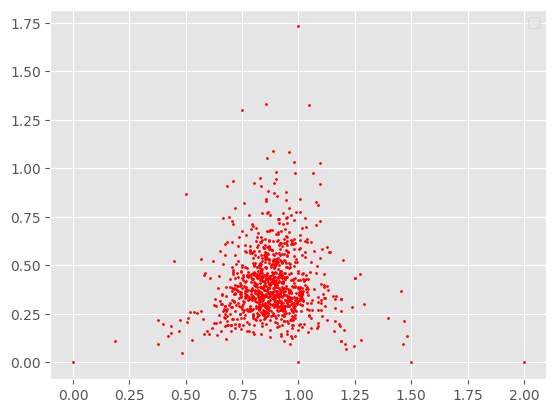

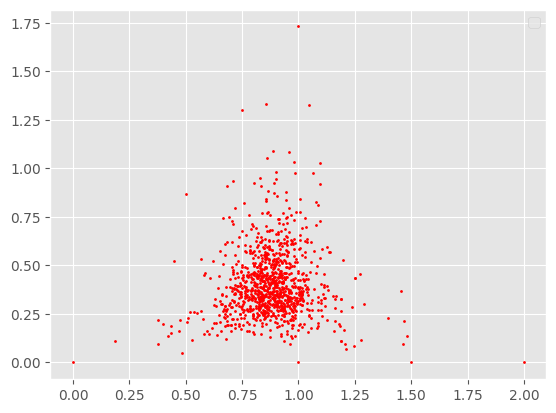

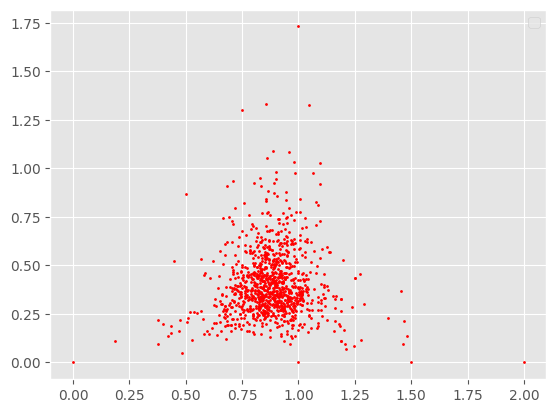

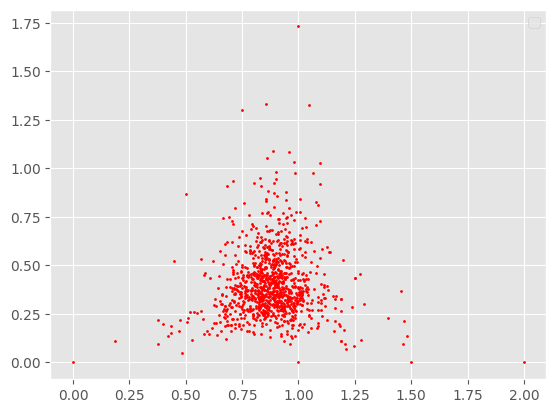

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1000x500', '-pix_fmt', 'rgba', '-r', '10', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/content/drive/MyDrive/CVs/iters.mp4']' returned non-zero exit status 255.

In [ ]:
anim.save('/content/drive/MyDrive/CVs/iters.mp4', writer = 'ffmpeg', fps = 10)